In [1]:
#importing basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data
dt = pd.read_csv("zomato.csv")

https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

In [3]:
#some basic information about the data set
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
dt.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
dt.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
dt.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
dt.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
#Removing columns that are not relevant
columns = ['url', 'address', 'phone', 'menu_item', 'listed_in(city)']
data = dt.drop(columns = columns, axis = 1)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


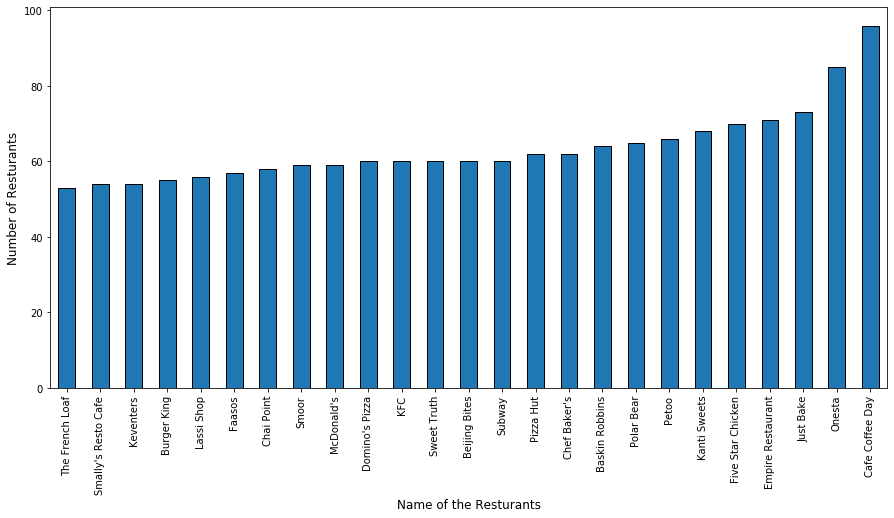

In [9]:
#plotting Number of Resturants of Each Brand
plt.figure(figsize = (15, 7))
data.name.value_counts()[0:25].sort_values().plot(kind = 'bar', edgecolor = 'k', linewidth = 1)
plt.ylabel("Number of Resturants", fontsize = 12)
plt.xlabel("Name of the Resturants", fontsize = 12)
plt.show()

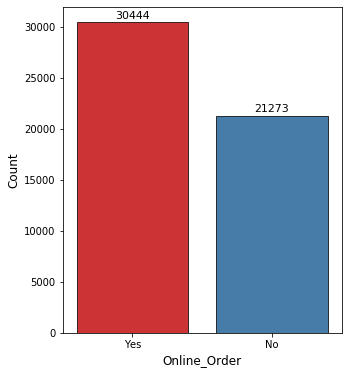

In [10]:
#visualization of how many resturant offer online order facility
plt.figure(figsize = (5,6))
ax = sns.countplot(data['online_order'], edgecolor = 'black', linewidth = 0.75, palette = "Set1")
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 700
    ax.annotate(format(p.get_height(), '.0f'), (x, y), ha = 'center', va = 'center', fontsize = 11)
plt.xlabel("Online_Order", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

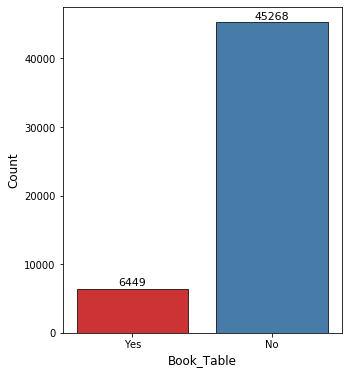

In [11]:
#Visualization of in how many resturants you can book table
plt.figure(figsize = (5,6))
ax = sns.countplot(data['book_table'], edgecolor = 'black', linewidth = 0.75, palette= "Set1")
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 900
    ax.annotate(format(p.get_height(), '.0f'), (x, y), ha = 'center', va = 'center', fontsize = 11)
plt.xlabel("Book_Table", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

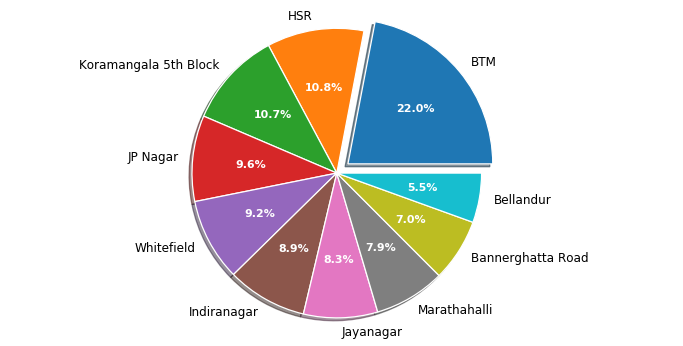

In [12]:
label = data["location"].value_counts()[:10].index
value = data["location"].value_counts()[:10].values

plt.figure(figsize = (12,6))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 
patches, texts, autotexts = plt.pie(value,
                                    labels       = label,
                                    explode      = explode,
                                    autopct      = '%.1f%%',
                                    shadow       = True,
                                    textprops    = {'size' : 12, 'color' : "k"},
                                    wedgeprops   = { 'linewidth' : 1.25, 'edgecolor' : "w" })
plt.setp(autotexts, size=11, weight="bold", color = "white")
plt.axis('equal')
plt.show()

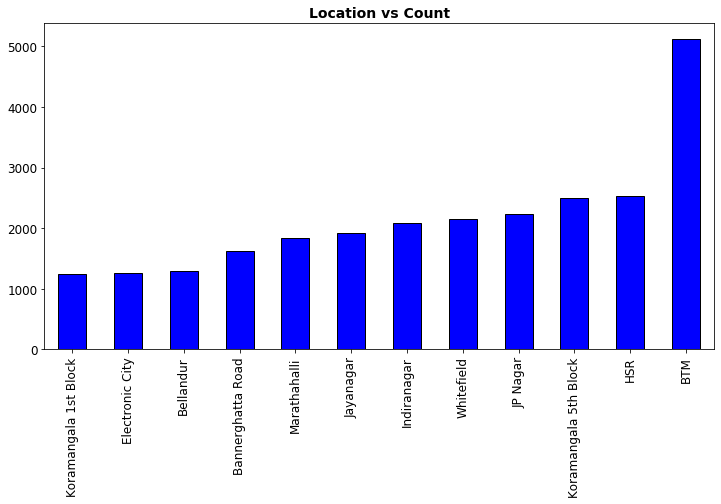

In [13]:
plt.figure(figsize = (12,6))
data['location'].value_counts()[:12].sort_values().plot(kind = 'bar', color = 'b', fontsize = 12, edgecolor = 'black')
plt.title("Location vs Count", weight = 'bold', fontsize = 14)
plt.show()

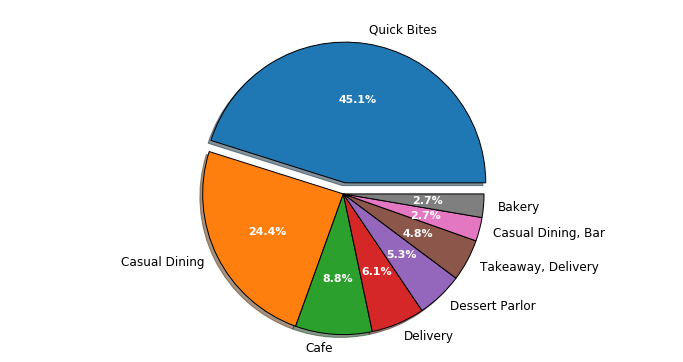

In [14]:
label = data["rest_type"].value_counts()[:8].index
value = data["rest_type"].value_counts()[:8].values

plt.figure(figsize = (12,6))
explode = (0.08, 0, 0, 0,0,0,0,0) 
patches, texts, autotexts = plt.pie(value,
                                    labels       = label,
                                    explode      = explode,
                                    autopct      = '%.1f%%',
                                    shadow       = True,
                                    textprops    = {'size' : 12, 'color' : "k"},
                                    wedgeprops   = { 'linewidth' : 1, 'edgecolor' : "black" })
plt.setp(autotexts, size=11, weight="bold", color = "white")
plt.axis('equal')
plt.title("Resturant Types", weight = "bold", size = 14, color  = "k")
plt.show()

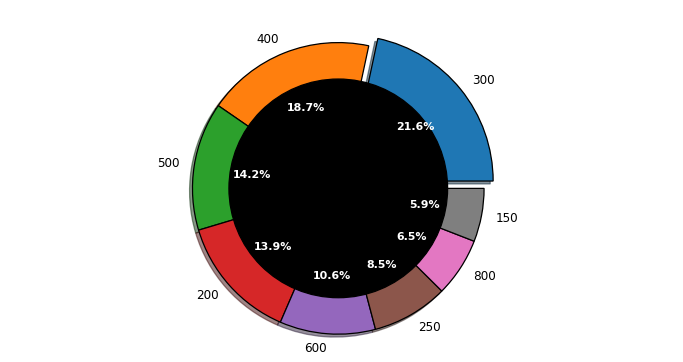

In [15]:
label = data["approx_cost(for two people)"].value_counts()[:8].index
value = data["approx_cost(for two people)"].value_counts()[:8].values

plt.figure(figsize = (12,6))
explode = (0.08, 0, 0, 0,0,0,0,0) 
patches, texts, autotexts = plt.pie(value,
                                    labels       = label,
                                    explode      = explode,
                                    autopct      = '%.1f%%',
                                    shadow       = True,
                                    textprops    = {'size' : 12, 'color' : "k"},
                                    wedgeprops   = { 'linewidth' : 1.25, 'edgecolor' : "black" })
plt.setp(autotexts, size=11, weight="bold", color = "white")
plt.axis('equal')
plt.title("Average Cost (for two people)", weight = "bold", size = 14, color  = "k")

#drawing the center circle for dognut shape
centre_circle = plt.Circle((0,0),0.75,color='black', fc='black',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show() 

In [16]:
idx = data["rate"].value_counts().index.unique()
val = data["rate"].value_counts().unique()
print(idx)
print(val)

Index(['NEW', '3.9/5', '3.8/5', '3.7/5', '3.9 /5', '3.8 /5', '3.7 /5', '3.6/5',
       '4.0/5', '4.0 /5', '3.6 /5', '4.1/5', '4.1 /5', '3.5/5', '3.5 /5',
       '3.4/5', '3.4 /5', '3.3/5', '4.2 /5', '3.3 /5', '4.2/5', '3.2/5',
       '4.3 /5', '3.2 /5', '3.1/5', '4.3/5', '3.1 /5', '4.4 /5', '3.0/5',
       '4.4/5', '3.0 /5', '2.9/5', '4.5 /5', '2.9 /5', '2.8/5', '2.8 /5',
       '4.5/5', '4.6 /5', '2.7/5', '2.6/5', '2.7 /5', '4.6/5', '2.6 /5',
       '4.7 /5', '4.7/5', '-', '2.5 /5', '2.5/5', '4.8 /5', '2.4/5', '2.4 /5',
       '4.9 /5', '2.3/5', '4.9/5', '4.8/5', '2.3 /5', '2.2/5', '2.1 /5',
       '2.1/5', '2.2 /5', '2.0 /5', '2.0/5', '1.8 /5', '1.8/5'],
      dtype='object')
[2208 2098 2022 2011 1874 1851 1810 1773 1609 1574 1543 1474 1431 1353
 1259 1217 1168 1165 1142 1019 1006  917  867  862  776  699  628  558
  519  465  427  409  375  313  287  247  175  170  143  137  125  117
   86   81   69   56   45   43   40   30   28   25   23   19   13   11
    7    4    3    2]


In [17]:
data.rate = data['rate'].replace('NEW',np.NaN)
data.rate = data['rate'].replace('-',np.NaN)
data.rate = data['rate'].replace('[ ]','',regex = True)
data.rate = data["rate"].str.split("/", expand = True)[0]
data.rate = data['rate'].astype(str)
data.rate = data['rate'].apply(lambda r: float(r))

In [18]:
idx = data["rate"].value_counts().index.unique()
val = data["rate"].value_counts().unique()
print(idx)
print(val)

Float64Index([3.9, 3.8, 3.7, 3.6, 4.0, 4.1, 3.5, 3.4, 3.3, 4.2, 3.2, 4.3, 3.1,
              4.4, 3.0, 2.9, 4.5, 2.8, 2.7, 4.6, 2.6, 4.7, 2.5, 2.4, 4.8, 4.9,
              2.3, 2.2, 2.1, 2.0, 1.8],
             dtype='float64')
[3972 3873 3821 3316 3183 2948 2784 2476 2310 2184 1873 1693 1561 1147
 1023  802  656  600  307  300  260  167  101   70   66   55   51   26
   24   11    5]


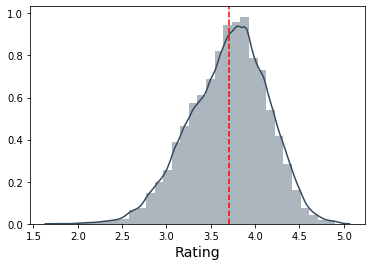

The mean value of the ratings is 3.700448817952717.


In [19]:
sns.distplot(data.rate, bins = 32, color = "#34495e")
plt.axvline(x= data.rate.mean(),ls='--',color='red')
plt.xlabel('Rating', fontsize = 14)
plt.show()
print('The mean value of the ratings is ' + str(data.rate.mean()) + '.')

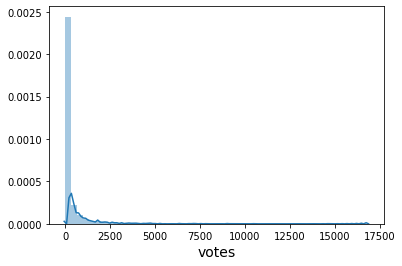

In [20]:
sns.distplot(data.votes)
#plt.axvline(x= data.votes.mean(),ls='--',color='red')
plt.xlabel('votes', fontsize = 14)
plt.show()

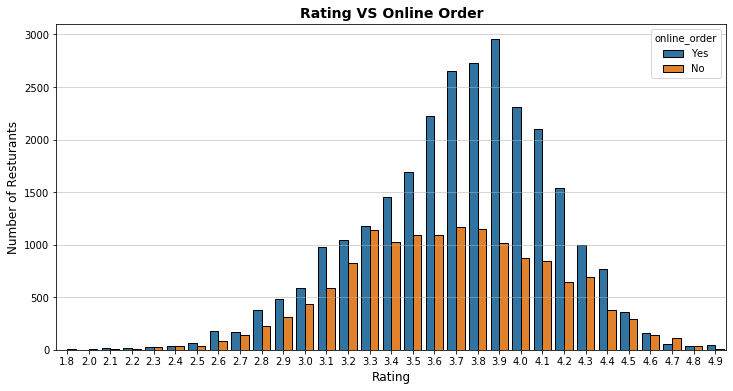

In [21]:
plt.figure(figsize = (12,6))
sns.countplot(x = data.rate, hue = data.online_order, edgecolor = 'k')
plt.grid(axis = 'y', alpha=0.65)
plt.xlabel("Rating", fontsize = 12)
plt.ylabel("Number of Resturants", fontsize = 12)
plt.title("Rating VS Online Order", weight = 'bold', fontsize = 14)
plt.show()

In [22]:
columns = ["name", "online_order", "book_table", "rate", "location", "rest_type", "cuisines", "approx_cost(for two people)"]
raw_data = data[columns].copy()

In [23]:
raw_data.head()

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [24]:
print(raw_data["online_order"].unique())
print(raw_data["online_order"].isna().sum())
print(raw_data["book_table"].unique())
print(raw_data["book_table"].isna().sum())

['Yes' 'No']
0
['Yes' 'No']
0


In [25]:
from sklearn import preprocessing
cat = preprocessing.LabelEncoder()

In [26]:
raw_data.loc[:, "online_order"] = cat.fit_transform(raw_data.loc[:, "online_order"])
raw_data.loc[:, "book_table"] = cat.fit_transform(raw_data.loc[:, "book_table"])
raw_data.head()

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,1,1,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,1,0,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,1,0,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,0,0,3.7,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,0,0,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [27]:
raw_data.loc[:, "rest_type"] = raw_data["rest_type"].str.replace(',', '')
raw_data.loc[:, "rest_type"] = raw_data["rest_type"].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

raw_data.loc[:, "cuisines"] = raw_data["cuisines"].str.replace(',', '')
raw_data.loc[:, "cuisines"] = raw_data["cuisines"].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

raw_data.loc[:, "approx_cost(for two people)"] = raw_data["approx_cost(for two people)"].str.replace(',' , '')
raw_data.loc[:, "approx_cost(for two people)"] = raw_data["approx_cost(for two people)"].astype('float')

raw_data.head()

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,1,1,4.1,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0
1,Spice Elephant,1,0,4.1,Banashankari,Casual Dining,Chinese Indian North Thai,800.0
2,San Churro Cafe,1,0,3.8,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,Banashankari,Bites Quick,Indian Indian North South,300.0
4,Grand Village,0,0,3.8,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0


In [28]:
raw_data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
location                          21
rest_type                          0
cuisines                           0
approx_cost(for two people)      346
dtype: int64

In [29]:
raw_data["rate"].fillna(raw_data["rate"].mean(), inplace = True)
raw_data.dropna(subset=['approx_cost(for two people)'],inplace=True)
raw_data.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
dtype: int64

In [30]:
raw_data.loc[:, "location"] = cat.fit_transform(raw_data["location"])
raw_data.loc[:, "rest_type"] = cat.fit_transform(raw_data["rest_type"])
raw_data.loc[:, "cuisines"] = cat.fit_transform(raw_data["cuisines"])
raw_data.head()

,name,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people)
0,Jalsa,1,1,4.1,1,40,1416,800.0
1,Spice Elephant,1,0,4.1,1,40,1429,800.0
2,San Churro Cafe,1,0,3.8,1,32,1199,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,1,29,1786,300.0
4,Grand Village,0,0,3.8,4,40,1832,600.0


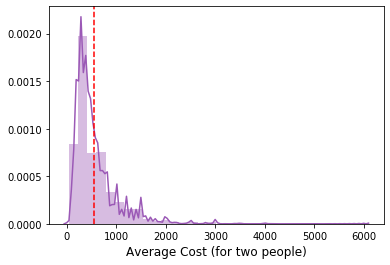

In [31]:
sns.distplot(raw_data["approx_cost(for two people)"], bins = 32, color = "#9b59b6")
plt.axvline(x= raw_data["approx_cost(for two people)"].mean(),ls='--',color='red')
plt.xlabel('Average Cost (for two people)', fontsize = 12)
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = ["rate", "location", "rest_type", "cuisines", "approx_cost(for two people)"]
scaler.fit(raw_data[col])
raw_data.loc[:, col] = scaler.transform(raw_data[col])

In [33]:
X = raw_data.drop(["name", "approx_cost(for two people)"], axis = 1).copy()
y = raw_data["approx_cost(for two people)"].copy()
print(X.shape)
print(y.shape)

(51371, 6)
(51371,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.head())
print(y_train.head())

       online_order  book_table      rate  location  rest_type  cuisines
14315             1           0  0.757308 -0.626591  -0.387328 -0.679266
42                1           0  0.504559 -1.288381  -0.387328 -0.217006
3288              1           0  0.504559 -1.178083   0.443039  0.358422
39540             1           0  0.757308  0.880819  -0.387328 -1.089738
8183              0           0  0.000196  1.947036  -0.387328  0.438982
14315   -0.923857
42      -0.126312
3288    -0.126312
39540   -0.582052
8183    -0.468117
Name: approx_cost(for two people), dtype: float64


In [35]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
s1 = r2_score(y_test, y_pred_rfr)
mse1 = mean_squared_error(y_test, y_pred_rfr)
print("r2_score: ", s1)
print("Mean Square error: ", mse1)

r2_score:  0.9742057001822001
Mean Square error:  0.026502398940929307


In [36]:
from sklearn.neural_network import MLPRegressor
rgr = MLPRegressor(hidden_layer_sizes = (25, 10), activation = 'relu', max_iter=500,
                   solver = 'sgd', learning_rate = 'adaptive', alpha = 0.001, random_state = 10)
rgr.fit(X_train, y_train)
y_pred = rgr.predict(X_test)
s2 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
print("r2_score: ", s2)
print("Mean Square error: ", mse2)

r2_score:  0.7013013173240215
Mean Square error:  0.3068984894851096


In [37]:
from sklearn.svm import SVR
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
s3 = r2_score(y_test, y_predict)
mse3 = mean_squared_error(y_test, y_predict)
print("r2_score: ", s3)
print("Mean Square error: ", mse3)

r2_score:  0.6695669299162276
Mean Square error:  0.3395040419198758


In [38]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 10)
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
s4 = r2_score(y_test, y_predicted)
mse4 =  mean_squared_error(y_test, y_predicted)
print("r2_score: ", s4)
print("Mean Square error: ", mse4)

r2_score:  0.9709482732512459
Mean Square error:  0.029849247998855664


[Text(0, 0, 'RandomForestRegressor'),
 Text(0, 0, 'MLPRegressor'),
 Text(0, 0, 'SVR'),
 Text(0, 0, 'DecisionTreeRegressor')]

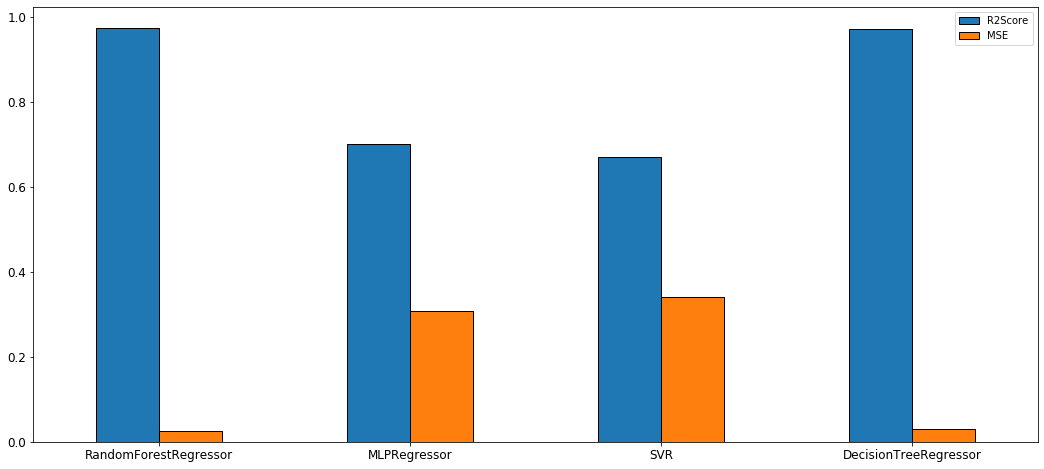

In [39]:
r2scores = [s1, s2, s3, s4]
MSE = [mse1, mse2, mse3, mse4]
names = ['RandomForestRegressor', 'MLPRegressor', 'SVR', 'DecisionTreeRegressor']
d = {'R2Score': r2scores, 'MSE': MSE}
algos = pd.DataFrame(d,index = names)

ax = algos.plot.bar(figsize=(18,8), fontsize = 12, linewidth = 1, edgecolor = 'k')
ax.set_xticklabels(names, rotation = 0)

In [40]:
from sklearn.model_selection import cross_val_score
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, X, y, cv=10)
print("SCORE: ", np.mean(scores))

SCORE:  0.9549086050693625


In [41]:
reg = DecisionTreeRegressor(random_state = 10)
scores = cross_val_score(reg, X, y, cv=10)
print("SCORE: ", np.mean(scores))

SCORE:  0.9406582200114147
